<a href="https://colab.research.google.com/github/iwatsuki-yuuki/AI-matuso/blob/main/reddit%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# redditÂàÜÊûê„ÉÑ„Éº„É´

In [98]:
!pip install -q praw openai transformers torch pandas matplotlib wordcloud

In [9]:
# googlecolob„ÇíÂÖ¨ÈñãÁî®„Å´API„ÅÆ„Ç≠„Éº„Çí‰ºè„Åõ„Çã
import os, getpass

print("‚ñº OpenAI API key „ÇíÂÖ•Âäõ„Åó„Å¶„Åè„Å†„Åï„ÅÑ")
os.environ["OPENAI_API_KEY"] = getpass.getpass()

print("‚ñº Reddit client_id „ÇíÂÖ•Âäõ„Åó„Å¶„Åè„Å†„Åï„ÅÑ")
os.environ["REDDIT_CLIENT_ID"] = getpass.getpass()

print("‚ñº Reddit client_secret „ÇíÂÖ•Âäõ„Åó„Å¶„Åè„Å†„Åï„ÅÑ")
os.environ["REDDIT_CLIENT_SECRET"] = getpass.getpass()

# ‰ªªÊÑè„ÅÆ user_agentÔºàÊé®Â•®: Ë™¨ÊòéÁöÑ„Å™ÊñáÂ≠óÂàóÔºâ
os.environ["REDDIT_USER_AGENT"] = "reddit-sentiment-bot/0.2 by u/SheepherderOnly9123"

print("Ë®≠ÂÆöÂÆå‰∫Ü")

‚ñº OpenAI API key „ÇíÂÖ•Âäõ„Åó„Å¶„Åè„Å†„Åï„ÅÑ
¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑
‚ñº Reddit client_id „ÇíÂÖ•Âäõ„Åó„Å¶„Åè„Å†„Åï„ÅÑ
¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑
‚ñº Reddit client_secret „ÇíÂÖ•Âäõ„Åó„Å¶„Åè„Å†„Åï„ÅÑ
¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑
‚úÖ „Ç≠„Éº„ÇíÁí∞Â¢ÉÂ§âÊï∞„Å´Ë®≠ÂÆö„Åó„Åæ„Åó„ÅüÔºà„Éé„Éº„Éà‰∏ä„Å´„ÅØÊÆã„Çä„Åæ„Åõ„ÇìÔºâ


In [99]:
# Êé•Á∂ö„ÉÜ„Çπ„ÉàÔºàreddit„Åå„ÅÜ„Åæ„ÅèÁπã„Åå„Å£„Å¶„Çã„ÅãÔºâ
!pip install -q praw

import praw
reddit = praw.Reddit(
    client_id     = os.getenv("REDDIT_CLIENT_ID"),
    client_secret = os.getenv("REDDIT_CLIENT_SECRET"),
    user_agent    = os.getenv("REDDIT_USER_AGENT")
)

# technology„Å´„Å§„ÅÑ„Å¶„ÅÆÊÉÖÂ†±„ÇíÂèñÂæó
for post in reddit.subreddit("technology").hot(limit=3):
    print("‚Ä¢", post.title)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



‚Ä¢ ‚ÄòThe vehicle suddenly accelerated with our baby in it‚Äô: the terrifying truth about why Tesla‚Äôs cars keep crashing | Tesla
‚Ä¢ Schools turn to handwritten exams as AI cheating surges
‚Ä¢ Samsung delays $44 billion Texas chip fab ‚Äî sources say completion halted because 'there are no customers'


In [100]:
# ÊÑüÊÉÖÂàÜÊûê„Åô„Çã„É¢„Éá„É´„ÇíË™≠„ÅøËæº„ÇÄ
# huggingface„Å´„ÅÇ„Å£„Åümodel„Çí‰Ωø„Å£„Åü
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch, numpy as np

MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"  # Ê±éÁî®„É¢„Éá„É´
tok   = AutoTokenizer.from_pretrained(MODEL)
mdl   = AutoModelForSequenceClassification.from_pretrained(MODEL)
labels = ["negative", "neutral", "positive"]

def hf_sentiment(text):
    inputs = tok(text, return_tensors="pt", truncation=True, max_length=256)
    with torch.no_grad():
        probs = torch.softmax(mdl(**inputs).logits, dim=-1)[0].numpy()
    return labels[int(np.argmax(probs))], float(np.max(probs))

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [101]:
# RedditAPI„ÅÆPRAW„Çí‰Ωø„ÅÑ„ÄÅÊåáÂÆö„Åó„Åüsubreddit„Åã„Çâ„Ç≠„Éº„ÉØ„Éº„ÉâÊ§úÁ¥¢„Åó„ÅüÊäïÁ®ø„Çø„Ç§„Éà„É´„Å®„Çø„Ç§„É†„Çπ„Çø„É≥„Éó„ÇíDataFrame„Å´„Åæ„Å®„ÇÅ„Å¶Ëøî„ÅôÈñ¢Êï∞
import praw, pandas as pd

reddit = praw.Reddit(
    client_id     = os.getenv("REDDIT_CLIENT_ID"),
    client_secret = os.getenv("REDDIT_CLIENT_SECRET"),
    user_agent    = os.getenv("REDDIT_USER_AGENT")
)

def fetch_reddit_titles(subreddit="technology", query="AI", limit=30):
    posts = reddit.subreddit(subreddit).search(query, limit=limit, sort="new")
    rows  = [[p.created_utc, p.title] for p in posts]
    return pd.DataFrame(rows, columns=["Time", "Title"])

In [102]:
# sentiment„ÅÆÂàó„Çídf„Å´ËøΩÂä†ÔºàÊÑüÊÉÖÂàó„Åß3ÂàÜÈ°ûÔºâ
df = fetch_reddit_titles("technology", "AI", limit=20)
df[["Sentiment", "Score"]] = df["Title"].apply(lambda t: pd.Series(hf_sentiment(t)))
df.head()

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Time                                              Title Sentiment  \
0  1.751727e+09  Schools turn to handwritten exams as AI cheati...  negative   
1  1.751727e+09  New research warns against trusting AI for mor...  negative   
2  1.751722e+09  EU says it will continue rolling out AI legisl...   neutral   
3  1.751668e+09  Ted Cruz‚Äôs Dumb Plan To Punish States That Reg...  negative   
4  1.751662e+09  Anthropic destroyed millions of print books to...  negative   

      Score  
0  0.668340  
1  0.791684  
2  0.822678  
3  0.822739  
4  0.747580

In [103]:
# gpt„ÇíÊúÄÊñ∞Áâà„Å´„Åô„Çã
!pip install -q --upgrade openai

In [104]:
from openai import OpenAI
client = OpenAI()

In [107]:
!pip install -q nltk scikit-learn

import nltk, re, string, pandas as pd, numpy as np
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from IPython.display import Markdown, display
from openai import OpenAI

nltk.download("stopwords", quiet=True)
stop_en = set(nltk.corpus.stopwords.words("english")) | set(ENGLISH_STOP_WORDS)
punct_tbl = str.maketrans("", "", string.punctuation)
client = OpenAI()

def analyze_and_visualize(sub, query, n=30, do_summary=True):
    # RedditÂèñÂæó
    df = fetch_reddit_titles(sub, query, n)

    # „Çª„É≥„ÉÅ„É°„É≥„ÉàÊé®ÂÆö
    df[["Sentiment", "Score"]] = df["Title"].apply(
        lambda t: pd.Series(hf_sentiment(t))
    )
    # GPTË¶ÅÁ¥Ñ
    if do_summary:
        df["Summary"] = df["Title"].apply(gpt_summary)

    # Ê£í„Ç∞„É©„Éï
    plt.figure(figsize=(5,3))
    df["Sentiment"].value_counts().reindex(labels).fillna(0).plot(
        kind="bar", color=["salmon", "lightgray", "skyblue"]
    )
    plt.title("Sentiment Distribution")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()

    # „ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„Éâ
    wc_text = " ".join(df["Title"])
    wc = WordCloud(width=700, height=400, background_color="white").generate(wc_text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title("Word Cloud")
    plt.show()

    return df

def gpt_summary(text, max_chars=60):
    prompt = (
        f"Ê¨°„ÅÆ Reddit ÊäïÁ®ø„Çø„Ç§„Éà„É´„Çí **Êó•Êú¨Ë™û** „Åß "
        f"{max_chars}ÊñáÂ≠ó‰ª•ÂÜÖ„Å´Ë¶ÅÁ¥Ñ„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ\n\n{text}"
    )
    res = client.chat.completions.create(
        model="gpt-3.5-turbo",       # GPT-4 „Åß„ÇÇÂèØ
        messages=[{"role": "user", "content": prompt}],
        temperature=0.3,
        max_tokens=120
    )
    return res.choices[0].message.content.strip()

def simple_keywords(titles, top_n=10):
    words = []
    for t in titles:
        tokens = re.sub(r"http\S+|[^A-Za-z']+", " ", t).lower().split()
        words.extend([w for w in tokens if w not in stop_en and len(w) > 2])
    return Counter(words).most_common(top_n)

def gpt_overall_summary(titles, max_chars=999):
    joined_titles = " / ".join(titles)

    prompt = (
        "„ÅÇ„Å™„Åü„ÅØSNSÂàÜÊûê„É¨„Éù„Éº„Éà‰ΩúÊàêAI„Åß„Åô„ÄÇ‰ª•‰∏ã„ÅÆ Reddit ÊäïÁ®ø‰∏ÄË¶ß„ÇíË™≠„ÅøÂèñ„Çä„ÄÅ"
        "Ê§úÁ¥¢„Ç≠„Éº„ÉØ„Éº„Éâ„Åù„ÅÆ„ÇÇ„ÅÆÔºà‰æã: AI, technology Á≠âÔºâ„Å´„ÅØËß¶„Çå„Åö„Å´„ÄÅ"
        "Ê¨°„ÅÆÊó•Êú¨Ë™û„ÉÜ„É≥„Éó„É¨„Éº„ÉàÂΩ¢Âºè„Åß„Åæ„Å®„ÇÅ„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ\n"
        "„Äê„ÉÜ„É≥„Éó„É¨„Éº„Éà„Äë\n"
        "„Äá„Äá„ÄÅ„Äá„Äá‚Ä¶„Å™„Å©„ÅÆÊäïÁ®ø„Å´„Å§„ÅÑ„Å¶Ê§úÁ¥¢„Åó„ÄÅÁ∑è„Åò„Å¶„Äá„Äá„ÅÆ„Çà„ÅÜ„Å™ÊÑèË¶ã„ÇÑ„Äá„Äá„ÅÆ„Çà„ÅÜ„Å™ÊÑèË¶ã„ÅåÂ§ö„Åè„ÅÇ„Çä„Åæ„Åó„Åü„ÄÇ"
        "„Åæ„ÅüÁâπ„Å´„Äá„Äá„Å´Èñ¢„Åô„ÇãÂÜÖÂÆπ„ÅåÂ§ö„Åã„Å£„Åü„Åß„Åô„ÄÇ\n"
        "‚Äª„ÉÜ„É≥„Éó„É¨„Éº„Éà‰∏≠„ÅÆ„Äá„Äá„Å´„ÅØ ‚ÄúÂÖ∑‰ΩìÁöÑ„Å™Ë©±È°å or ÊÑèË¶ã‚Äù „ÇíÂÖ•„Çå„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ\n\n"
        "„ÄêÊäïÁ®ø‰∏ÄË¶ß„Äë\n"
        f"{joined_titles}"
    )

    res = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.3,
        max_tokens=999
    )
    return res.choices[0].message.content.strip()

def analyze_with_report(sub="technology", query="AI", n=100, do_summary=True):

    df = analyze_and_visualize(sub, query, n, do_summary)


    counts = df["Sentiment"].value_counts().reindex(labels).fillna(0).astype(int)
    kw_top = simple_keywords(df["Title"], 10)
    overall = gpt_overall_summary(df["Title"].tolist(), 150)

    # ‚ë¢ Markdown „É¨„Éù„Éº„Éà
    report_lines = [
        f"### ‚ú® Reddit `{sub}` √ó **{query}** ÂÖ®‰ΩìÁ∑èË©ïÔºà{n}‰ª∂Ôºâ",
        f"> **{overall}**",
        "",
        "#### ‚ñ† „Çª„É≥„ÉÅ„É°„É≥„ÉàÂàÜÂ∏É",
        *(f"- **{k.capitalize()}**: {v}‰ª∂" for k, v in counts.items()),
        "",
        "#### ‚ñ† „Ç≠„Éº„ÉØ„Éº„Éâ TOP10",
        *(f"- {w}: {c}Âõû" for w, c in kw_top),
    ]
    if "Summary" in df:
        samples = df["Summary"].head(10).tolist()       # ‚Üê 3 ‚ûú 10 ‰ª∂
        report_lines += [
            "",
            "#### ‚ñ† Ë¶ÅÁ¥Ñ„Çµ„É≥„Éó„É´Ôºà10‰ª∂Ôºâ",              # ‚Üê „Çø„Ç§„Éà„É´„ÇÇÂêà„Çè„Åõ„Çã
            *(f"- {s}" for s in samples)
        ]

    display(Markdown("\n".join(report_lines)))
    return df

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



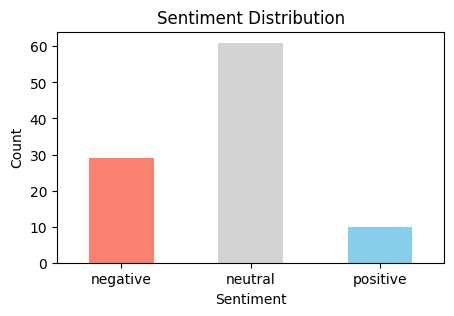

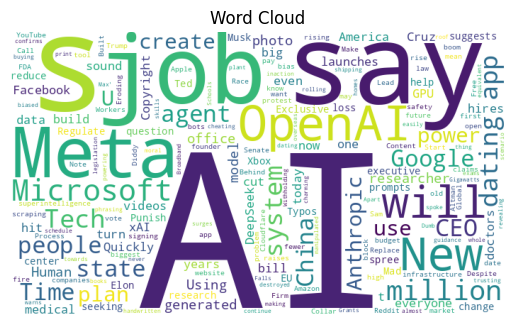

### ‚ú® Reddit `technology` √ó **AI** ÂÖ®‰ΩìÁ∑èË©ïÔºà100‰ª∂Ôºâ
> **Reddit„ÅÆÊäïÁ®ø„ÇíË™≠„ÅøÂèñ„Çä„Åæ„Åó„Åü„ÄÇAI„Å´Èñ¢„Åô„ÇãÊäïÁ®ø„ÅåÂ§ö„Åã„Å£„Åü„Åß„Åô„ÄÇÂÖ∑‰ΩìÁöÑ„Å´„ÅØ„ÄÅÂ≠¶Ê†°„ÅåAI„ÅÆ‰∏çÊ≠£Âà©Áî®„Å´ÂØæÊäó„Åó„Å¶ÊâãÊõ∏„Åç„ÅÆË©¶È®ì„ÇíÂ∞éÂÖ•„Åó„Åü„Çä„ÄÅAI„ÅåÂÄ´ÁêÜÁöÑ„Å™ÊåáÈáù„Å®„Åó„Å¶‰ø°È†º„Åï„Çå„Å™„ÅÑ„Åì„Å®„ÇíË≠¶Âëä„Åô„ÇãÁ†îÁ©∂„ÅåË°å„Çè„Çå„Åü„Çä„ÄÅAI„ÅåÊ±Ç„ÇÅ„Çâ„Çå„ÇãË¶èÂà∂„ÇíEU„ÅåÈÄ≤„ÇÅ„Çã„Å®Áô∫Ë°®„Åó„Åü„Çä„ÄÅAI„ÅåÈõªË©±„Çª„É≥„Çø„Éº„ÅÆÂïèÈ°å„ÇíÂ¢ó„ÇÑ„Åô„Å®„ÅÑ„ÅÜÂ£∞„Åå„ÅÇ„Çä„Åæ„Åó„Åü„ÄÇ„Åæ„Åü„ÄÅAI„ÅåÂåªÁôÇ„Ç±„Ç¢„ÇíÊ±Ç„ÇÅ„Çã‰∫∫„ÄÖ„ÇíÂ¶®„Åí„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çã„Å®„ÅÑ„ÅÜË©±È°å„ÇÇ„ÅÇ„Çä„Åæ„Åó„Åü„ÄÇAI„Å´Èñ¢„Åô„ÇãÊßò„ÄÖ„Å™ÊÑèË¶ã„ÇÑÊá∏Âøµ„ÅåReddit„ÅßË≠∞Ë´ñ„Åï„Çå„Å¶„ÅÑ„Çã„Çà„ÅÜ„Åß„Åô„ÄÇ**

#### ‚ñ† „Çª„É≥„ÉÅ„É°„É≥„ÉàÂàÜÂ∏É
- **Negative**: 29‰ª∂
- **Neutral**: 61‰ª∂
- **Positive**: 10‰ª∂

#### ‚ñ† „Ç≠„Éº„ÉØ„Éº„Éâ TOP10
- says: 14Âõû
- openai: 11Âõû
- new: 10Âõû
- meta: 10Âõû
- dating: 7Âõû
- microsoft: 7Âõû
- jobs: 6Âõû
- tech: 6Âõû
- people: 5Âõû
- job: 5Âõû

#### ‚ñ† Ë¶ÅÁ¥Ñ„Çµ„É≥„Éó„É´Ôºà10‰ª∂Ôºâ
- AI„ÅÆ‰∏çÊ≠£Ë°åÁÇ∫„ÅåÂ¢óÂä†„Åô„Çã‰∏≠„ÄÅÂ≠¶Ê†°„ÅåÊâãÊõ∏„ÅçË©¶È®ì„Å´Âàá„ÇäÊõø„Åà
- AI„Å´ÈÅìÂæ≥ÁöÑ„Å™ÊåáÈáù„Çí‰ø°È†º„Åô„Åπ„Åç„Åß„Å™„ÅÑ„Å®„ÅÑ„ÅÜÊñ∞„Åó„ÅÑÁ†îÁ©∂„ÄÇ„Ç∑„Çπ„ÉÜ„É†„ÅØË°åÂãï„ÇíÂèñ„Çâ„Å™„ÅÑÂÇæÂêë„Åå„ÅÇ„Çä„ÄÅË≥™Âïè„ÅÆË®Ä„ÅÑÂõû„Åó„ÅßÁ∞°Âçò„Å´Êìç‰Ωú„Åï„Çå„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çã„ÄÇ
- EU„ÅØAIÈñ¢ÈÄ£„ÅÆÊ≥ïÂà∂Â∫¶„Çí‰∫àÂÆöÈÄö„ÇäÂ±ïÈñã„Åô„Çã„Å®Áô∫Ë°®
- „ÉÜ„ÉÉ„Éâ„Éª„ÇØ„É´„Éº„Ç∫„ÅÆÊÑö„Åã„Å™Ë®àÁîªÔºöAIË¶èÂà∂„Çí„Åô„ÇãÂ∑û„Å´„Éñ„É≠„Éº„Éâ„Éê„É≥„ÉâË£úÂä©Èáë„ÇíÊãíÂê¶„Åô„ÇãÊ°à„ÅåÁ†¥Á∂ª
- AI„É¢„Éá„É´ÊßãÁØâ„ÅÆ„Åü„ÇÅ„Å´AnthropicÁ§æ„Åå‰ΩïÁôæ‰∏áÂÜä„ÇÇ„ÅÆÂç∞Âà∑Êú¨„ÇíÁ†¥Â£ä
- „Éá„Éº„Éà„Ç¢„Éó„É™„ÅßAI„ÅåÈ≠ÖÂäõÁöÑ„Å´‰ºöË©±„Çí‰ΩúÊàê„Åó„Å¶„ÅÑ„Çã„ÄÇ
- „Ç§„Éº„É≠„É≥„Éª„Éû„Çπ„ÇØ„ÅåxAI„ÅåÊµ∑Â§ñ„ÅÆÁô∫ÈõªÊâÄ„ÇíË≥ºÂÖ•„Åó„ÄÅÊñ∞„Åó„ÅÑ„Éá„Éº„Çø„Çª„É≥„Çø„Éº„ÅÆÈõªÂäõÊ∫ê„Å®„Åó„Å¶Á±≥ÂõΩ„Å´Ëº∏ÈÄÅ„Åô„Çã„Åì„Å®„ÇíÁ¢∫Ë™ç
- AI„Åå„Äå„Éû„ÉÉ„Éâ„Éû„ÉÉ„ÇØ„Çπ„Äç„ÅÆ„Çà„ÅÜ„Å™Áä∂Ê≥Å„Çí‰Ωú„ÇäÂá∫„ÅôÂèØËÉΩÊÄß„Åå„ÅÇ„Çã„ÄÅ„Å®ÁµåÊ∏àÂ≠¶ËÄÖ„ÅåË≠¶Âëä
- XboxÂππÈÉ®„ÅåAI„Çí‰Ωø„Å£„Å¶Ëß£Èõá„ÅÆÁóõ„Åø„ÇíÂíå„Çâ„Åí„Çã„Åì„Å®„ÇíÊèêÊ°à
- AI„ÅåÂåªÁôÇ„Ç±„Ç¢„ÇíÊé¢„Åô„Åì„Å®„Çí desuasu „Åô„Çã„Åü„ÇÅ„Å´„ÄÅ„Çø„Ç§„Éó„Éü„Çπ„ÇÑ‰øóË™û„Åå‰Ωø„Çè„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ

In [108]:
# ÂºïÊï∞„ÅØtechnology„Å®AI„Å´„Åó„Å¶ÊäïÁ®øÊï∞„ÅØ100ÂÄã„Åã„ÇâÊ§úÁ¥¢
result_df = analyze_with_report("technology", "AI", n=100, do_summary=True)

# StreamlitÂÖ¨ÈñãÁî®„Ç≥„Éº„Éâ

In [94]:
# --- Step 1: LT „ÇíÂÆåÂÖ® BG Ëµ∑ÂãïÔºà„Çª„É´„ÅØ„Åô„ÅêÁµÇ„Çè„ÇãÔºâ---
%%bash --bg
npx localtunnel --port 8501 --subdomain reddit-sentiment > /tmp/lt.log 2>&1

In [95]:
%%writefile app.py
import os, re, string, pandas as pd, numpy as np, nltk, matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
import praw, torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from openai import OpenAI
import streamlit as st


nltk.download("stopwords", quiet=True)
stop_en = set(nltk.corpus.stopwords.words("english")) | set(ENGLISH_STOP_WORDS)
labels  = ["negative","neutral","positive"]

MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tok   = AutoTokenizer.from_pretrained(MODEL)
mdl   = AutoModelForSequenceClassification.from_pretrained(MODEL)
client = OpenAI()
reddit = praw.Reddit(
    client_id     = os.getenv("REDDIT_CLIENT_ID"),
    client_secret = os.getenv("REDDIT_CLIENT_SECRET"),
    user_agent    = os.getenv("REDDIT_USER_AGENT")
)


def hf_sentiment(text):
    inputs = tok(text, return_tensors="pt", truncation=True, max_length=256)
    with torch.no_grad():
        logits = mdl(**inputs).logits
        probs  = torch.softmax(logits, dim=-1).squeeze().cpu().numpy()
    return labels[int(probs.argmax())]

def hf_sentiment(text):
    inputs = tok(text, return_tensors="pt", truncation=True, max_length=256)
    with torch.no_grad():
        probs = torch.softmax(mdl(**inputs).logits, dim=-1)[0].numpy()
    return labels[int(np.argmax(probs))]

def gpt_summary(text, max_chars=60):
    prompt = f"Ê¨°„ÅÆRedditÊäïÁ®ø„Çø„Ç§„Éà„É´„ÇíÊó•Êú¨Ë™û„Åß{max_chars}ÊñáÂ≠ó‰ª•ÂÜÖ„Å´Ë¶ÅÁ¥Ñ„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ\n\n{text}"
    res = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role":"user","content":prompt}],
        temperature=0.3, max_tokens=120
    )
    return res.choices[0].message.content.strip()

def gpt_overall(titles):
    joined = " / ".join(titles)
    prompt = (
        "„ÅÇ„Å™„Åü„ÅØSNSÂàÜÊûê„É¨„Éù„Éº„Éà‰ΩúÊàêAI„Åß„Åô„ÄÇ‰ª•‰∏ã„ÅÆRedditÊäïÁ®ø‰∏ÄË¶ß„ÇíË™≠„ÅøÂèñ„Çä„ÄÅ"
        "Ê§úÁ¥¢Ë™û„Åù„ÅÆ„ÇÇ„ÅÆ„Å´„ÅØËß¶„Çå„Åö„Å´„ÄÅ"
        "Ôºä„Äá„Äá„ÄÅ„Äá„Äá‚Ä¶„Å™„Å©„ÅÆÊäïÁ®ø„ÅåÂ§ö„ÅèË¶ã„Çâ„Çå„ÄÅÁ∑è„Åò„Å¶„Äá„Äá„ÅÆ„Çà„ÅÜ„Å™ÊÑèË¶ã„ÇÑ„Äá„Äá„ÅÆ„Çà„ÅÜ„Å™ÊÑèË¶ã„ÅåÂ§ö„Åè„ÅÇ„Çä„Åæ„Åó„Åü„ÄÇ"
        "„Åæ„ÅüÁâπ„Å´„Äá„Äá„Å´Èñ¢„Åô„ÇãÂÜÖÂÆπ„ÅåÂ§ö„Åã„Å£„Åü„Åß„Åô„ÄÇ"
        "„Å®„ÅÑ„ÅÜÊó•Êú¨Ë™û„ÉÜ„É≥„Éó„É¨„Éº„Éà„Åß„Åæ„Å®„ÇÅ„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ\n\n" + joined
    )
    res = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role":"user","content":prompt}],
        temperature=0.3, max_tokens=999
    )
    return res.choices[0].message.content.strip()

def simple_kw(titles, top_n=10):
    words=[]
    for t in titles:
        tokens = re.sub(r"http\S+|[^A-Za-z']+"," ",t).lower().split()
        words += [w for w in tokens if w not in stop_en and len(w)>2]
    return Counter(words).most_common(top_n)

# streamlit„ÅÆUI„Å´„Å§„ÅÑ„Å¶
st.title("üìä Reddit Sentiment Analyzer")

sub = st.text_input("SubredditÔºà„Ç≥„Éü„É•„Éã„ÉÜ„Ç£Ôºâ")
qry = st.text_input("Ê§úÁ¥¢„Ç≠„Éº„ÉØ„Éº„Éâ")
n   = st.slider("ÂèñÂæó‰ª∂Êï∞", 20, 150, 50)
run = st.button("ÂàÜÊûê„Åô„Çã")

if run:
    with st.spinner("Reddit ÂèñÂæó‚Ä¶"):
        posts = reddit.subreddit(sub).search(qry, limit=n, sort="new")
        df = pd.DataFrame([[p.created_utc, p.title] for p in posts], columns=["Time","Title"])

    st.write(f"ÂèñÂæó‰ª∂Êï∞: {len(df)} ‰ª∂")

    with st.spinner("ÊÑüÊÉÖÂàÜÊûê‚Ä¶"):
        df["Sentiment"] = df["Title"].apply(hf_sentiment)

    with st.spinner("GPT Ë¶ÅÁ¥Ñ‰∏≠‚Ä¶"):
        df["Summary"] = df["Title"].apply(gpt_summary)

    st.subheader("üìù Á∑èË©ï")
    st.success(gpt_overall(df["Title"].tolist()))

    st.subheader("üìä „Çª„É≥„ÉÅ„É°„É≥„ÉàÂàÜÂ∏É")
    st.bar_chart(df["Sentiment"].value_counts().reindex(labels).fillna(0))

    st.subheader("‚òÅÔ∏è WordCloud")
    wc = WordCloud(width=700,height=400,background_color="white").generate(" ".join(df["Title"]))
    st.image(wc.to_array())

    st.subheader("üìã Ë¶ÅÁ¥Ñ„Çµ„É≥„Éó„É´Ôºà10‰ª∂Ôºâ")
    for s in df["Summary"].head(10):
        st.markdown(f"- {s}")

    st.subheader("üóÇÔ∏è „Éá„Éº„Çø„Éï„É¨„Éº„É†")
    st.dataframe(df)

Overwriting app.py


In [96]:
!streamlit run app.py --server.port 8501 &>/dev/null &

In [97]:
!tail -f /tmp/lt.log

your url is: https://reddit-sentiment.loca.lt
^C


In [92]:
!curl -s ifconfig.me

104.198.219.185